# Algorithms and Applications in Social Networks
## Homework 1
### Ido Lerer 206120545, Offek Gil 308315092

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

### Question 1a

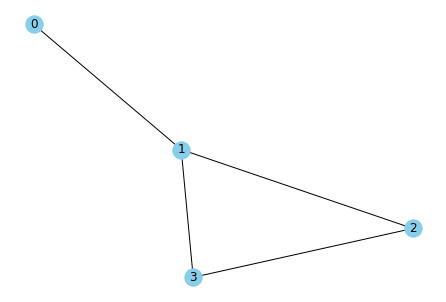

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def erdos_renyi_graph(n,p):
    G=nx.Graph()
    for i in range(n):
        G.add_node(i)
    
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < p:
                G.add_edge(i,j)
    return G        
   
    
    
G = erdos_renyi_graph(4,0.8)
nx.draw(G,with_labels = True, node_color="skyblue")
plt.show()

### Question 1b

In [3]:
def node_clustering(G, node):
    neighb = G[node]
    neighb_dict = dict(neighb)
    possible_edges = (len(neighb) * (len(neighb)-1)) / 2 
    
    if possible_edges == 0:
        return 0
    
    edges = 0
    for n in neighb:
        neighb_dict.pop(n)
        for n2 in neighb_dict:
            if n in G[n2]:
                edges += 1
    return edges / possible_edges
                

def graph_clustering(G):
    sum_clusts = 0
    for node in G:
        sum_clusts +=  node_clustering(G, node)
    return sum_clusts / len(G)

node_clustering(G, 2)
print(graph_clustering(G))

0.5833333333333333


### Question 1c

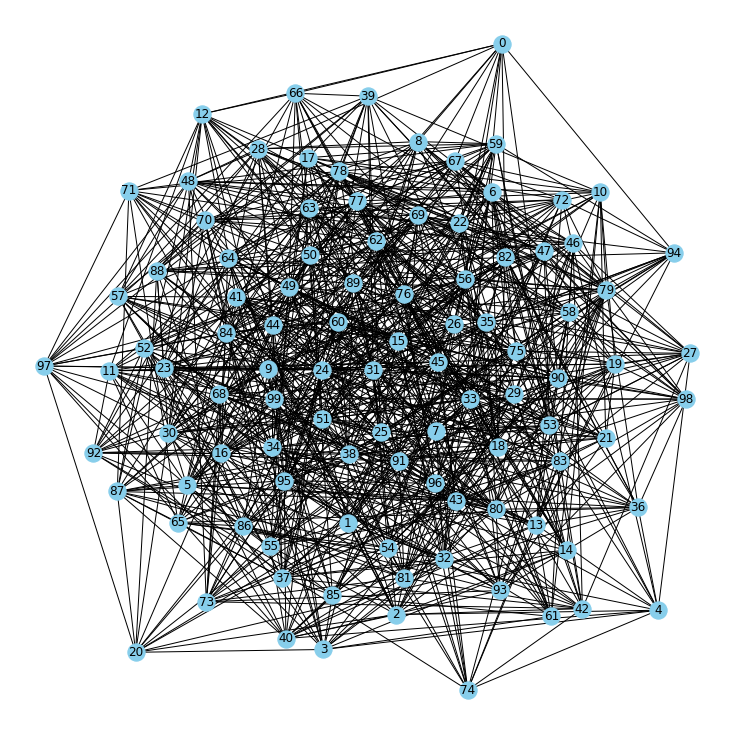

In [4]:
G1 = erdos_renyi_graph(100,0.2)

plt.figure(figsize=(10,10)) 
nx.draw(G1, with_labels = True, node_color="skyblue")
plt.show()

Diameter: 3
Clustering coefficient: 0.18244357865976507


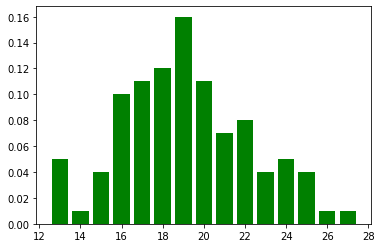

In [5]:
def degree_dist(G):
    N = len(G)
    Nk = {}
    for node in G:
        deg = G.degree[node]
        if deg not in Nk:
            Nk[deg] = 0
        Nk[deg] += 1
    for i in Nk:
        Nk[i] = Nk[i]/N
    return Nk

G1_dd = degree_dist(G1)
G1_diameter =  nx.diameter(G1)
G1_clust = graph_clustering(G1)

plt.bar(list(G1_dd.keys()), G1_dd.values(), color='g')
print("Diameter:", G1_diameter)
print("Clustering coefficient:", G1_clust)

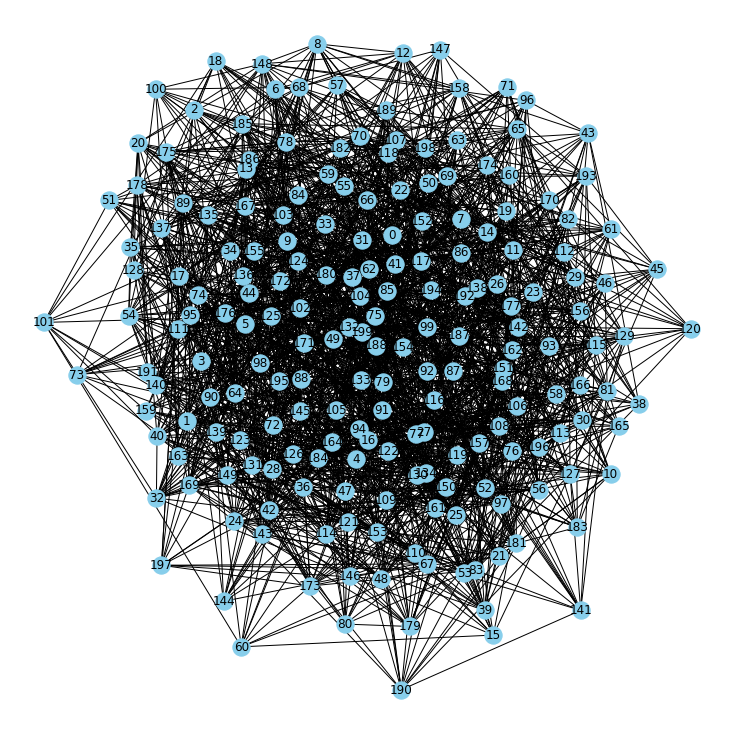

In [6]:
#Q1c - n = 200 p = 0.1

G2 = erdos_renyi_graph(200,0.1)

plt.figure(figsize=(10,10)) 
nx.draw(G2, with_labels = True, node_color="skyblue")
plt.show()

Diameter: 3
Clustering coefficient: 0.10147170183926386


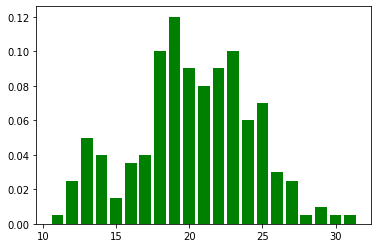

In [7]:
G2_dd = degree_dist(G2)
G2_diameter =  nx.diameter(G2)
G2_clust = graph_clustering(G2)

plt.bar(list(G2_dd.keys()), G2_dd.values(), color='g')
print("Diameter:", G2_diameter)
print("Clustering coefficient:", G2_clust)

<p dir="rtl" style="text-align:right">
1.c
ניתן לראות כי התפלגות הדרגות של שני הגרפים דומה לצורת פעמון, סביב מרכז של דרגה 20.
תוצאה זו הגיונית עבור שני סוגי הגראפים הרדנומליים - בגרף עם 100 הצמתים, כל קשת נוצרת בהסתברות 0.2, ועל כן אם לכל צומת יש פוטנציאל אפשרי של 100 קשתות שיוצאות ממנה, אכן נצפה לראות כי 20% מכלל האפשרויות, יופיעו - כלומר ממוצע של 20 קשתות מכל צומת.
ומבחינת הגרף עם 200 הצמתים, לכל צומת יש פוטנציאל של עד 200 קשתות, אך כל קשת נוצרת בהסתברות 0.1, משמע ממוצע של 20 קשתות לצומת גם כאן.
</p>
<p dir="rtl" style="text-align:right">
קוטר - לשני הגרפים יצא ערך קוטר 3, משמע מכל צומת בגרף ניתן להגיע לכל צומת אחר, במקסימום 3 צעדים. תוצאה זו הגיונית בעינינו - אם מסתכלים על צומת בודד בגרף, למשל גרף ה100 צמתים, אז יוצאות ממנו בממוצע 20 קשתות לצמתים שונים. בממוצע, מכל אחד מהצמתים השכנים, יוצאים גם כן 20 קשתות, כלומר 400 קשתות שמובילות אל צמתים שגם מהם בממוצע יוצאים 20 קשתות. על כן ההסתברות שלא יהיה ניתן להגיע מצומת אחד אל צומת אחר בגרף תוך 3 צעדים, היא מזערית. בגרף ה-200 צמתים, הדבר דומה.
</p>
<p dir="rtl" style="text-align:right">
קלאסטרינג - בכל גרף יצא כי פרמטר הקלאסטרינג קרוב מאוד לפרמטר ההסתברות ליצירת קשת (p).
זוהי תוצאה לה ציפיני, שכן פרמטר הקלאסטרינג מסתכל עבור קבוצה של צמתים, על כל הקשתות הפוטנציאליות שיכולות לעבור ביניהם, ונותן את יחס הקשתות הקיימות, מתוך הפוטנציאל. על כן הגיוני כי יחס זה ישאף אל ההסתברות הכללית לקיום קשת בגרף.
</p>

### Question 3